In [2]:
!pip install mo-gymnasium
!pip install git+https://github.com/LucasAlegre/morl-baselines.git

  Cloning https://github.com/LucasAlegre/morl-baselines.git to /tmp/pip-req-build-8y0kbqcr
  Running command git clone --filter=blob:none --quiet https://github.com/LucasAlegre/morl-baselines.git /tmp/pip-req-build-8y0kbqcr
  Resolved https://github.com/LucasAlegre/morl-baselines.git to commit 7a163b760db309ab29c5afd33b2af427dc3fc719
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import gymnasium as gym
import mo_gymnasium as mo_gym
import numpy as np
import sys
sys.path.append('/content/drive/MyDrive')
from PVCN.PVCN import PVCN

# Deep Sea Treasure

A standard deterministic MOMDP which we can use to test the algorithm initially.

In [4]:
env = mo_gym.make("deep-sea-treasure-v0")
agent = PVCN(env, np.array([1,1,1]), log=False, use_popf=True, max_buffer_size=512, policy_lr=1e-3, popf_lr=5e-4, batch_size=32, alpha=0)

agent.train(1000000, 20, num_value_samples=4, num_policy_steps=500, num_popf_steps=500, num_pf_points=10, num_expl_episodes=10, log_every=2, prune_pf_every=10, pf_prune_threshold=np.array([.1,1]))

/usr/local/lib/python3.12/dist-packages/gymnasium/spaces/box.py:306: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Pareto Front: 
 [[array([ 19.6, -46. ], dtype=float32) 46]
 [array([ 14., -12.], dtype=float32) 12]
 [array([ 8.2, -8. ], dtype=float32) 8]
 [array([ 15.1, -26. ], dtype=float32) 26]
 [array([ 20.3, -47. ], dtype=float32) 47]
 [array([ 0.7, -1. ], dtype=float32) 1]]
step 1483 	 return [  9.38 -11.6 ], ([3.813 1.625]), new return [ 14.041 -12.   ] 	 policy loss 1.216E+00 	 popf loss 5.229E+02
Pareto Front: 
 [[array([ 19.6, -46. ], dtype=float32) 46]
 [array([ 14.2, -11. ], dtype=float32) 11]
 [array([ 8.2, -8. ], dtype=float32) 8]
 [array([ 15.1, -26. ], dtype=float32) 26]
 [array([ 20.3, -47. ], dtype=float32) 47]
 [array([ 0.7, -1. ], dtype=float32) 1]]


KeyboardInterrupt: 

In [ ]:
from morl_baselines.multi_policy.pareto_q_learning.pql import PQL
pql_agent = PQL(env, np.array([1,1]), gamma=1)
pql_agent.train(500000,env, np.array([-100,-130]), num_eval_weights_for_eval=5, log_every=5)

eval/cardinality,▁▁▁▁▁▁▁▁▁▁▂▂▁▂▂▅▃▂▃▃▁▁▃▃▂▂▁▆▇█▅▂▆▆▇▃▃▃▅▂
eval/eum,▆▇▇▂▁▂▃▃▄▅▅▅▅▆▇▅▅▄▇▆▄▅▅▇▇▇▇▇█▇▇▇█▇▇▇▇▇▇█
eval/hypervolume,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
global_step,▁▁▂▂▂▂▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇███
eval/cardinality,3
eval/eum,-36.78731
eval/hypervolume,0
global_step,2486


AuthenticationError: An error occurred while verifying the API key.

# Random MOMDP

In order to test MO-AWR on a random environment, we can use the code at https://github.com/rradules/POP-following/blob/main/envs/randommomdp.py to generate an MOMDP where we can decide randomness and the problem size ourselves.



In [ ]:
env = mo_gym.make("random_momdp-v0", nstates=5, nobjectives=2, nactions=3, nsuccessor=2, seed=12)

from gymnasium.wrappers import FlattenObservation

/usr/local/lib/python3.11/dist-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/usr/local/lib/python3.11/dist-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


# Water Reservoir (discrete)
A discrete version of a dam MOMDP (https://github.com/Farama-Foundation/MO-Gymnasium/blob/main/mo_gymnasium/envs/water_reservoir/dam_env.py).



In [2]:
env = mo_gym.make("dam_env-v0", s_0=np.int32([5]), seed=0, penalize=False)
agent = PVCN(env, np.array([1,1,1]), log=False, use_popf=True, max_buffer_size=512, policy_lr=1e-4, popf_lr=5e-4, batch_size=32, alpha=0.1)
agent.train(1000000, 25, num_value_samples=50, num_policy_steps=500, num_popf_steps=500, num_eval_iter=10, num_pf_points=10, num_expl_episodes=10, log_every=2, prune_pf_every=10, pf_prune_threshold=np.array([5,5]))

/usr/local/lib/python3.12/dist-packages/gymnasium/spaces/box.py:236: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/usr/local/lib/python3.12/dist-packages/gymnasium/spaces/box.py:306: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


KeyboardInterrupt: 

In [ ]:
from mo_awr.PVI import pvi
env = mo_gym.make("dam_env-v0", s_0=np.int32([5]), seed=0, penalize=False)
pcs = pvi(env, gamma=1, max_iter=1000, min_return=0, save_every=5)

/usr/local/lib/python3.12/dist-packages/gymnasium/spaces/box.py:236: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/usr/local/lib/python3.12/dist-packages/gymnasium/spaces/box.py:306: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Value Iteration number: 0
Looping over state 0
Looping over state 1
Looping over state 2
Looping over state 3
Looping over state 4
Looping over state 5
Looping over state 6
Looping over state 7
Looping over state 8
Looping over state 9
Looping over state 10
Looping over state 11
Looping over state 12
Looping over state 13
Looping over state 14
Looping over state 15
Looping over state 16
Looping over state 17
Looping over state 18
Looping over state 19
Value Iteration number: 1
Looping over state 0
Looping over state 1
Looping over state 2
Looping over state 3
Looping over state 4
Looping over state 5
Looping over state 6
Looping over state 7
Looping over state 8
Looping over state 9
Looping over state 10
Looping over state 11
Looping over state 12
Looping over state 13
Looping over state 14
Looping over state 15
Looping over state 16
Looping over state 17
Looping over state 18
Looping over state 19
Saving this round
Value Iteration number: 2
Looping over state 0


KeyboardInterrupt: 

In [ ]:
from morl_baselines.multi_policy.pcn.pcn import PCN
pcn_agent = PCN(env, np.array([1,1,1]), gamma=1)
pcn_agent.train(500000, env, np.array([-150,-100]), num_eval_weights_for_eval=5, num_points_pf=10)


/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liam-mertens02 (vub-ai) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x256 and 150x64)

# Pareto Q-learning

In [ ]:
from morl_baselines.multi_policy.pareto_q_learning.pql import PQL
env = mo_gym.make("dam_env-v0", s_0=np.int32([5]), seed=0, penalize=False)
pql_agent = PQL(env, np.array([-100, -100]), gamma=1, epsilon_decay_steps=2500000)
pql_agent.train(10000000,env, num_eval_weights_for_eval=10)
pcs = list(pql_agent.get_local_pcs(5))
np.savetxt('pql.csv', pcs, delimiter=",", fmt='%.2f')

/usr/local/lib/python3.12/dist-packages/gymnasium/spaces/box.py:236: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/usr/local/lib/python3.12/dist-packages/gymnasium/spaces/box.py:306: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(
/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liam-mertens02 (vub-ai) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


KeyboardInterrupt: 

In [ ]:
pql_agent.get_local_pcs(5)

{(-80552.39752346031, 0.0),
 (-69152.71830134433, -1.0),
 (-9383.605913708423, -2.0),
 (-8156.628933771667, -3.0),
 (-6990.451093823126, -4.0),
 (-3822.0122607074395, -5.0),
 (-1376.4219520058077, -6.0),
 (-1148.9395945153472, -7.0),
 (-1129.973069891235, -7.999956339504015),
 (-0.0003675119441381844, -8.0)}

In [ ]:
pcs = list(pql_agent.get_local_pcs(5))
np.savetxt('pql.csv', pcs, delimiter=",", fmt='%.2f')

In [ ]:
from morl_baselines.common.performance_indicators import hypervolume
print(hypervolume(np.array([-150,-50]), np.array(list(pql_agent.get_local_pcs(0)))))

6416.022941916653


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def eval_pcn(n, n_points):
  evals = np.zeros((n_points,2))
  for i in range(n):
    e, p, _ = pcn_agent.evaluate(env, np.array([100,100]), n_points)
    evals += np.array(e)
  evals /= n
  return evals, p
def plot_eval(evals, pf, filename):
  x2, y2 = zip(*pf)
  x3, y3 = zip(*evals)
  plt.figure(figsize=(8, 6))
  plt.scatter(x2, y2, color='red', label='Pareto front')
  plt.scatter(x3, y3, color='green', label='evaluated pf')

  # Add labels and legend
  plt.xlabel('Obj 1')
  plt.ylabel('Obj 2')
  plt.legend()
  plt.title('Comparison of PF and evaluations')
  plt.savefig(filename)
  plt.show()
def make_csv(evals, pf, filename):
  comb = np.hstack((pf, evals))
  np.savetxt(filename, comb, delimiter=",", fmt='%.2f')

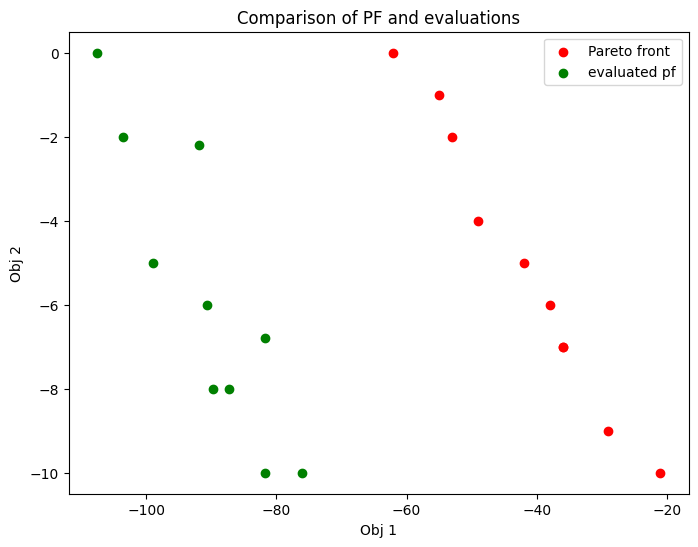

In [ ]:
evals, pf = eval_pcn(10, 10)
plot_eval(evals, pf, "pcn_eval.png")
make_csv(evals, pf, "pcn_eval.csv")

In [ ]:
!zip -r /content/drive/MyDrive/mo_awr/results.zip /content/drive/MyDrive/mo_awr/Results/

updating: content/drive/MyDrive/mo_awr/Results/ (stored 0%)
updating: content/drive/MyDrive/mo_awr/Results/plots/ (stored 0%)
updating: content/drive/MyDrive/mo_awr/Results/plots/training_plot_1.png (deflated 13%)
updating: content/drive/MyDrive/mo_awr/Results/plots/training_plot_2.png (deflated 13%)
updating: content/drive/MyDrive/mo_awr/Results/plots/training_plot_3.png (deflated 12%)
updating: content/drive/MyDrive/mo_awr/Results/plots/training_plot_4.png (deflated 11%)
updating: content/drive/MyDrive/mo_awr/Results/plots/training_plot_5.png (deflated 11%)
updating: content/drive/MyDrive/mo_awr/Results/plots/training_plot_6.png (deflated 11%)
updating: content/drive/MyDrive/mo_awr/Results/plots/training_plot_7.png (deflated 10%)
updating: content/drive/MyDrive/mo_awr/Results/plots/training_plot_8.png (deflated 10%)
updating: content/drive/MyDrive/mo_awr/Results/plots/training_plot_9.png (deflated 10%)
updating: content/drive/MyDrive/mo_awr/Results/plots/training_plot_10.png (deflate

In [ ]:
!rm -rf /content/drive/MyDrive/mo_awr/Results/

In [ ]:
agent.experience_replay

[(-30.594135,
  1900,
  [Transition(observation=array([5], dtype=int32), action=8, reward=array([-4.,  0.], dtype=float32), return_=array([-53., -45.], dtype=float32), horizon=30, next_observation=array([0]), terminal=False, init=True),
   Transition(observation=array([0]), action=0, reward=array([-2., -3.], dtype=float32), return_=array([-49., -45.], dtype=float32), horizon=29, next_observation=array([2]), terminal=False, init=False),
   Transition(observation=array([2]), action=1, reward=array([-1., -2.], dtype=float32), return_=array([-47., -42.], dtype=float32), horizon=28, next_observation=array([3]), terminal=False, init=False),
   Transition(observation=array([3]), action=4, reward=array([-4.,  0.], dtype=float32), return_=array([-46., -40.], dtype=float32), horizon=27, next_observation=array([0]), terminal=False, init=False),
   Transition(observation=array([0]), action=2, reward=array([-4., -1.], dtype=float32), return_=array([-42., -40.], dtype=float32), horizon=26, next_obse

# Training Notes
- Most episodes in the ER only reach the first reward:
  - ER buffer is constructed such that new episodes are always added
  - This removes episodes by:
    1. Duplicates
    2. Distance metric (L2 + crowding)
    3. Oldest first
  - better returns are achieved as better PF returns are added to the PF

- buffer size, batch size and num expl episodes are important choices:
  - Num expl episodes needs to add enough episodes for them to be of significance during the next training iteration(s)
  - If num_exl is too large (and buffer size too small) then exploration episodes can overwrite episodes with good returns!
  - Larger buffer size means less chance of these exploration episodes to be used for training in the next timestep. A sufficient size is needed to ensure enough points are in te buffer for computing each point in the pf (at least batch_size*num_pf_points, but pref. more)
  - If buffer size is too large, then convergence might be slower on small environments

Questions:
- Policy explorations improved drastically after using tanh inbetween hidden layers
- Add stdev used for exploration as param => encourage exploration when only a single point is in the PF
- Learn a PCS for every state (this way we can handle multiple initial states) (difficult to plot though)
- Check if policies are stationary vs non-stationary => computing mean return as target for V might be wrong if we consider non-stationary policies => pick batch such that horizon is same within batch
    